In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [ ]:
cust=pd.read_csv("/content/cust_data.xlsx - in.csv")
cust

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [ ]:
cust1=cust.fillna(method="ffill")
cust1

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,F,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cust1["Gender"]=cust1["Gender"].map({"M":1,"F":2})
cust1

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,1,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,1,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cust1.drop("Cust_ID",axis=1)

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x=cust1.iloc[:,1:]
x

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.cluster import KMeans
model=KMeans(5)
model.fit(x)
model.fit_predict(x)
identified_cluster=model.fit_predict(x)
identified_cluster

array([4, 2, 4, ..., 3, 3, 1], dtype=int32)

In [ ]:
cust1["cluster"]=identified_cluster
cust1

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,cluster
0,1,1,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,2,2,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
2,3,1,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
3,4,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,5,2,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
29996,29997,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
29997,29998,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
29998,29999,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


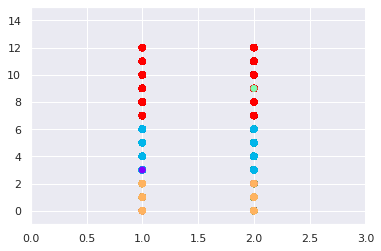

In [ ]:
plt.scatter(cust1["Gender"],cust1["Orders"],c=cust1["cluster"],cmap="rainbow")
plt.xlim(0,3)
plt.ylim(-1,15)
plt.show()

In [15]:
l=[]
for i in range(1,10):
  model=KMeans(i)
  model.fit(x)
  wcss=model.inertia_
  l.append(wcss)
print(l)  

[923130.8651999973, 621224.1912008945, 572880.1633707979, 547694.5218310743, 527901.3848101705, 511819.5177699663, 497151.57855105196, 485310.1341612585, 474493.06448045326]


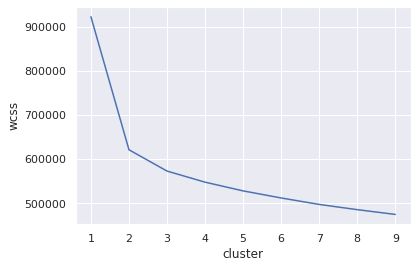

In [16]:
clusters=range(1,10)
plt.plot(clusters,l)
plt.xlabel("cluster")
plt.ylabel("wcss")
plt.show()